In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
from ast import literal_eval
import pandas as pd
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def read_data(filename):
    data = pd.read_csv(filename, sep='\t')
    data['tags'] = data['tags'].apply(literal_eval)
    return data

In [0]:
train_ds = read_data('/content/drive/My Drive/NLP/train.tsv')
validation_ds = read_data('/content/drive/My Drive/NLP/validation.tsv')
X_test = pd.read_csv('/content/drive/My Drive/NLP/test.tsv', sep='\t')

In [0]:
train_ds.head()

,title,tags
0,How to draw a stacked dotplot in R?,[r]
1,mysql select all records where a datetime fiel...,"[php, mysql]"
2,How to terminate windows phone 8.1 app,[c#]
3,get current time in a specific country via jquery,"[javascript, jquery]"
4,Configuring Tomcat to Use SSL,[java]


In [0]:
validation_ds.head()

,title,tags
0,Why odbc_exec always fail?,"[php, sql]"
1,Access a base classes variable from within a c...,[javascript]
2,"Content-Type ""application/json"" not required i...","[ruby-on-rails, ruby]"
3,Sessions in Sinatra: Used to Pass Variable,"[ruby, session]"
4,"Getting error - type ""json"" does not exist - i...","[ruby-on-rails, ruby, json]"


In [0]:
X_test.head()

,title
0,Warning: mysql_query() expects parameter 2 to ...
1,get click coordinates from <input type='image'...
2,How to implement cloud storage for media asset...
3,What is catcomplete in jQuery's autocomplete p...
4,Error building Android app with Cordova 3.1 CLI


In [0]:
X_train = train_ds['title']
y_train = train_ds['tags']

In [0]:
X_val = validation_ds['title']
y_val = validation_ds['tags']

In [0]:
import re

In [0]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def text_prepare(text): ### The function will take in text and lower case it remove the stopwords, symbols and return it.
    text = text.lower() ### Write a code which can change the input text to lowercase.
    text = re.sub(REPLACE_BY_SPACE_RE," ",text) ### Write a code which replaces REPLACE_BY_SPACE_RE (above mentioned) symbols by space in text
    text = re.sub(BAD_SYMBOLS_RE,"",text) ### Write a code which deletes symbols which are in BAD_SYMBOLS_RE (above mentioned) from text
    
    ### Write a code which deletes stopwords from text
    text = text.split();             
    text = ' '.join([i for i in text if i not in STOPWORDS])
    return text

In [0]:
def test_text_prepare():
    examples = ["SQL Server - any equivalent of Excel's CHOOSE function?",
                "How to free c++ memory vector<int> * arr?"]
    answers = ["sql server equivalent excels choose function", 
               "free c++ memory vectorint arr"]
    for ex, ans in zip(examples, answers):
        if text_prepare(ex) != ans:
            return "Wrong answer for the case: '%s'" % ex
    return 'Basic tests are passed.'

In [0]:
test_text_prepare()

'Basic tests are passed.'

In [0]:
X_train = [text_prepare(x) for x in X_train]
X_val = [text_prepare(x) for x in X_val]
X_test = [text_prepare(x) for x in X_test]

In [0]:
X_train[:5]

['draw stacked dotplot r',
 'mysql select records datetime field less specified value',
 'terminate windows phone 81 app',
 'get current time specific country via jquery',
 'configuring tomcat use ssl']

In [0]:
# Dictionary of all tags from train corpus with their counts.
tags_counts = {}
# Dictionary of all words from train corpus with their counts.
words_counts = {}

all_tags = []
vocabulary=[]
from collections import Counter
from nltk.tokenize.treebank import TreebankWordTokenizer
twd = TreebankWordTokenizer()

for tag in y_train:
    all_tags.extend(tag)

for txt in X_train:
    vocabulary.extend(twd.tokenize(txt))

tags_counts = Counter(all_tags)
words_counts = Counter(vocabulary)

In [0]:
import operator

Words_Count_Sorted = sorted(words_counts.items(), key=operator.itemgetter(1),reverse=True)
Tags_Count_Sorted = sorted(tags_counts.items(), key=operator.itemgetter(1),reverse=True)

In [0]:
Words_Count_Sorted[:3]

[('using', 8278), ('c', 5800), ('php', 5614)]

In [0]:
Tags_Count_Sorted[:3]

[('javascript', 19078), ('c#', 19077), ('java', 18661)]

In [0]:
DICT_SIZE = 5000

ALL_WORDS =[i for i,j in sorted(words_counts.items(), key=operator.itemgetter(1),reverse=True)[:5000]]

WORDS_TO_INDEX = {}
for count, word in enumerate(ALL_WORDS):
    WORDS_TO_INDEX.update({word:count})
    
INDEX_TO_WORDS = dict((v,k) for k,v in WORDS_TO_INDEX.items())
#ALL_WORDS = WORDS_TO_INDEX.keys()

def my_bag_of_words(text, words_to_index, dict_size):
        
    ### Write a function which returns a vector which is a bag-of-words representation of 'text'
    result_vector = np.zeros(dict_size)
    
    for word in text.split():
        if word in words_to_index.keys():
            x= words_to_index[word]
            result_vector[x]=1

    return result_vector

In [0]:
def test_my_bag_of_words():
    words_to_index = {'hi': 0, 'you': 1, 'me': 2, 'are': 3}
    examples = ['hi how are you']
    answers = [[1, 1, 0, 1]]
    for ex, ans in zip(examples, answers):
        if (my_bag_of_words(ex, words_to_index, 4) != ans).any():
            return "Wrong answer for the case: '%s'" % ex
    return 'Basic tests are passed.'

In [0]:
test_my_bag_of_words()

'Basic tests are passed.'

In [0]:
from scipy import sparse as sp_sparse

In [0]:
X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_train])
X_val_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_val])
X_test_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_test])
print('X_train shape ', X_train_mybag.shape)
print('X_val shape ', X_val_mybag.shape)
print('X_test shape ', X_test_mybag.shape)

X_train shape  (100000, 5000)
X_val shape  (30000, 5000)
X_test shape  (1, 5000)


In [0]:
row = X_train_mybag[10].toarray()[0]
row

array([0., 0., 0., ..., 0., 0., 0.])

In [0]:
print("non_zero_elements_count of 11th row: ", len(row[row != 0]))

non_zero_elements_count of 11th row:  7


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
def tfidf_features(X_train, X_val, X_test):
    
    # Fit the vectorizer on the train set
    # Transform the train, test, and val sets and return the result
       
    tfidf_vectorizer = TfidfVectorizer(token_pattern = '(\S+)') # we want c++ or c# to be there
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_val_tfidf = tfidf_vectorizer.transform(X_val)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    return X_train_tfidf, X_val_tfidf, X_test_tfidf, tfidf_vectorizer.vocabulary_

In [0]:
X_train_tfidf, X_val_tfidf, X_test_tfidf, tfidf_vocab = tfidf_features(X_train, X_val, X_test)
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}

In [0]:
list(tfidf_vocab.keys()).index("c#")

167

In [0]:
'c#' in tfidf_vocab

True

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer

In [0]:
mlb = MultiLabelBinarizer(classes=sorted(tags_counts.keys()))
y_train = mlb.fit_transform(y_train)
y_val = mlb.fit_transform(y_val)

In [0]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

In [0]:
def train_classifier(X_train, y_train):
    # Create and fit LogisticRegression and LinearSVC wraped into OneVsRestClassifier.

    clf = OneVsRestClassifier(LogisticRegression(random_state=0)).fit(X_train, y_train)
    
    #for base_clf in (LinearSVC(random_state=0), LogisticRegression(random_state=0)):
        #clf = OneVsRestClassifier(base_clf).fit(X, y)
    
    return clf  ### clf is the model

In [0]:
classifier_mybag = train_classifier(X_train_mybag, y_train)
classifier_tfidf = train_classifier(X_train_tfidf, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
y_val_predicted_labels_mybag = classifier_mybag.predict(X_val_mybag)
y_val_predicted_scores_mybag = classifier_mybag.decision_function(X_val_mybag)

y_val_predicted_labels_tfidf = classifier_tfidf.predict(X_val_tfidf)
y_val_predicted_scores_tfidf = classifier_tfidf.decision_function(X_val_tfidf)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [0]:
def print_evaluation_scores(y_val, predicted):
    print ("Accuracy",accuracy_score(y_val, predicted))
    print ("F1 Score",f1_score(y_val, predicted, average='macro'))
    print ("Average Precision",average_precision_score(y_val, predicted, average='macro') )

In [0]:
print('Bag-of-words')
print_evaluation_scores(y_val, y_val_predicted_labels_mybag)
print('Tfidf')
print_evaluation_scores(y_val, y_val_predicted_labels_tfidf)

Bag-of-words
Accuracy 0.3527
F1 Score 0.5062218818120117
Average Precision 0.34707379537249516
Tfidf
Accuracy 0.33626666666666666
F1 Score 0.4598657061568162
Average Precision 0.3115844561793255


In [0]:
import os
os.chdir("/content/drive/My Drive/NLP/")

In [0]:
from metrics import roc_auc
%matplotlib inline

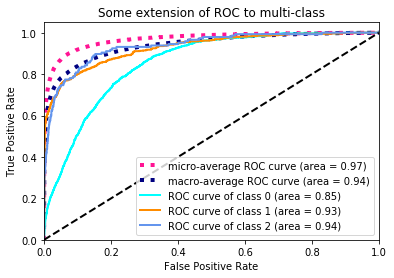

In [0]:
n_classes = len(tags_counts)
roc_auc(y_val, y_val_predicted_scores_mybag, n_classes)

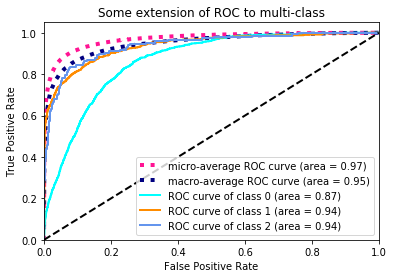

In [0]:
n_classes = len(tags_counts)
roc_auc(y_val, y_val_predicted_scores_tfidf, n_classes)

In [0]:
classifier_mybag = OneVsRestClassifier(LogisticRegression(penalty="l1",C=1)).fit(X_train_mybag, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
y_val_predicted_labels_mybag = classifier_mybag.predict(X_val_mybag)

In [0]:
print('Bag-of-words')
print_evaluation_scores(y_val, y_val_predicted_labels_mybag)

Bag-of-words
Accuracy 0.3591
F1 Score 0.5183286530482012
Average Precision 0.3569918613437343


In [0]:
test_predictions = classifier_mybag.predict(X_test_mybag)
test_pred_inversed = mlb.inverse_transform(test_predictions)